In [1]:
import squidpy as sq
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import dask.dataframe as dd
import dask.array as da
import dask.bag as db

In [3]:
import scanpy as sc
import squidpy as sq

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

# load the pre-processed dataset
#adata = sq.datasets.four_i()

scanpy==1.9.1 anndata==0.7.8 umap==0.5.3 numpy==1.19.5 scipy==1.8.1 pandas==1.4.3 scikit-learn==1.1.1 statsmodels==0.13.2 python-igraph==0.9.10 pynndescent==0.5.7
squidpy==1.2.2


In [4]:
from pyseq import image_analysis as ia
image_path = '/gpfs/commons/groups/nygcfaculty/PySeq/20210428_mouse_genotype_2/zmax2'
images = ia.get_HiSeqImages(image_path)

/gpfs/commons/home/jsingh/PySeq2500/pyseq/image_analysis.py:955: RuntimeWarning: Failed to open Zarr store with consolidated metadata, falling back to try reading non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  im = xr.open_zarr(fn).to_array()


ImageAnalysis::Opened m387ntgb3_zmax m387ntga2_zmax m387ntgb2_zmax m388g93aa3_zmax m388g93aa1_zmax m388g93ab1_zmax m388g93ab3_zmax m388g93ab2_zmax m387ntgb1_zmax m387ntga3_zmax m388g93aa2_zmax m387ntga1_zmax 


In [5]:
type(images[0])

pyseq.image_analysis.HiSeqImages

In [6]:
type(images[0])

pyseq.image_analysis.HiSeqImages

In [7]:
m387ntgb3_zmax = images[0]
m387ntgb3_zmax.im

<xarray.DataArray 'm387ntgb3_zmax' (cycle: 4, channel: 4, row: 10467, col: 10752)>
dask.array<getitem, shape=(4, 4, 10467, 10752), dtype=int16, chunksize=(1, 1, 10467, 1792), chunktype=numpy.ndarray>
Coordinates:
  * channel  (channel) int64 558 0 687 740
  * cycle    (cycle) int64 1 2 3 4
Dimensions without coordinates: row, col
Attributes:
    first_group:  0
    machine:      None
    scale:        1
    overlap:      256
    fixed_bg:     1

In [8]:
type(m387ntgb3_zmax.im)

xarray.core.dataarray.DataArray

In [9]:
ima = m387ntgb3_zmax.im
del ima.attrs['machine']

In [10]:
m387ntgb3_zmax.im.to_netcdf("m387ntgb3_zmax.nc")

TypeError: Invalid shape (4, 10467, 10752) for image data

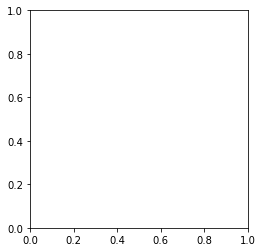

In [12]:
import matplotlib.pyplot as plt
plt.imshow(m387ntgb3_zmax.im.sel(cycle=1))
plt.savefig("sfd.tiff")

In [ ]:
######## dask play ####

In [23]:
%matplotlib inline

from dask.distributed import Client
import xarray as xr

In [27]:
client = Client(n_workers = 2, threads_per_worker = 2, memory_limit = '1GB')

/gpfs/commons/home/jsingh/.conda/envs/spatial/lib/python3.9/site-packages/distributed/node.py:180: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35862 instead
  warnings.warn(


In [28]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:35862/status,
Dashboard: http://127.0.0.1:35862/status,Workers: 2
Total threads: 4,Total memory: 1.86 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34807,Workers: 2
Dashboard: http://127.0.0.1:35862/status,Total threads: 4
Started: Just now,Total memory: 1.86 GiB
Comm: tcp://127.0.0.1:33423,Total threads: 2
Dashboard: http://127.0.0.1:35305/status,Memory: 0.93 GiB
Nanny: tcp://127.0.0.1:33515,


In [30]:
ds = xr.tutorial.open_dataset('air_temperature',
                              chunks={'lat': 25, 'lon': 25, 'time': -1})
ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 dask.array<chunksize=(2920, 25, 25), meta=np.ndarray>
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [31]:
da = ds['air']
da

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
dask.array<open_dataset-004d73a257ea235d4cf12de66e3b3fa4air, shape=(2920, 25, 53), dtype=float32, chunksize=(2920, 25, 25), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [32]:
da.data

dask.array<open_dataset-004d73a257ea235d4cf12de66e3b3fa4air, shape=(2920, 25, 53), dtype=float32, chunksize=(2920, 25, 25), chunktype=numpy.ndarray>

In [33]:
# Using Standard Xarray Operations:
da2 = da.groupby('time.month').mean('time')
da3 = da - da2
da3

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53, month: 12)>
dask.array<sub, shape=(2920, 25, 53, 12), dtype=float32, chunksize=(2920, 25, 25, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [34]:
da2

<xarray.DataArray 'air' (month: 12, lat: 25, lon: 53)>
dask.array<stack, shape=(12, 25, 53), dtype=float32, chunksize=(1, 25, 25), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]